In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
results = pd.read_csv('data/results.csv')
races = pd.read_csv('data/races.csv')

df = pd.merge(results, races, on = ['raceId'])
# df = df[df['position'] != '\\N']
# df = df[df['time_x'] != '\\N']
df = df[df['year'] != 2022]
test = df.groupby(['driverId', 'year'])['points'].apply(sum)
test = test.reset_index()


In [4]:
# https://stackoverflow.com/questions/39512260/calculating-gini-coefficient-in-python-numpy

def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

(array([23., 10.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  3.55,  7.1 , 10.65, 14.2 , 17.75, 21.3 , 24.85, 28.4 ,
        31.95, 35.5 , 39.05, 42.6 , 46.15, 49.7 , 53.25, 56.8 , 60.35,
        63.9 , 67.45, 71.  ]),
 <BarContainer object of 20 artists>)

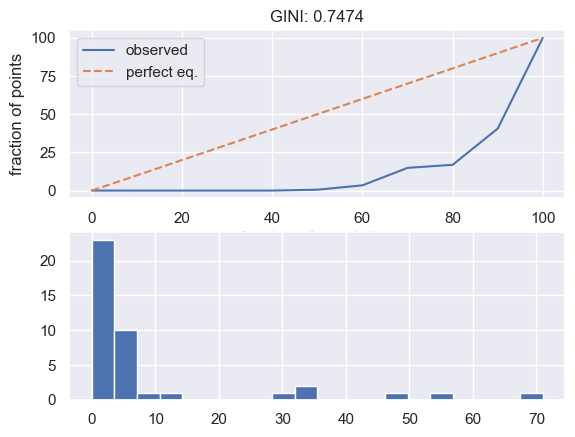

In [43]:
season_2015 = df.groupby(['year', 'driverId'])['points'].apply(list)
season_2015 = season_2015.reset_index()
season_2015 = season_2015[season_2015['year'] == 1980]
season_2015['total_points'] = list(map(lambda x: sum(x), season_2015['points']))

# v = np.random.rand(500)
v = season_2015['total_points'].values
bins, result, gini_val = G(v)


# plt.figure()
# plt.subplot(2, 1, 1)
# plt.plot(bins, result, label="observed")
# plt.plot(bins, bins, '--', label="perfect eq.")
# plt.xlabel("fraction of population")
# plt.ylabel("fraction of points")
# plt.title("GINI: %.4f" %(gini_val))
# plt.legend()
# plt.subplot(2, 1, 2)
# plt.hist(v, bins=20)

Text(0.5, 0, 'Season')

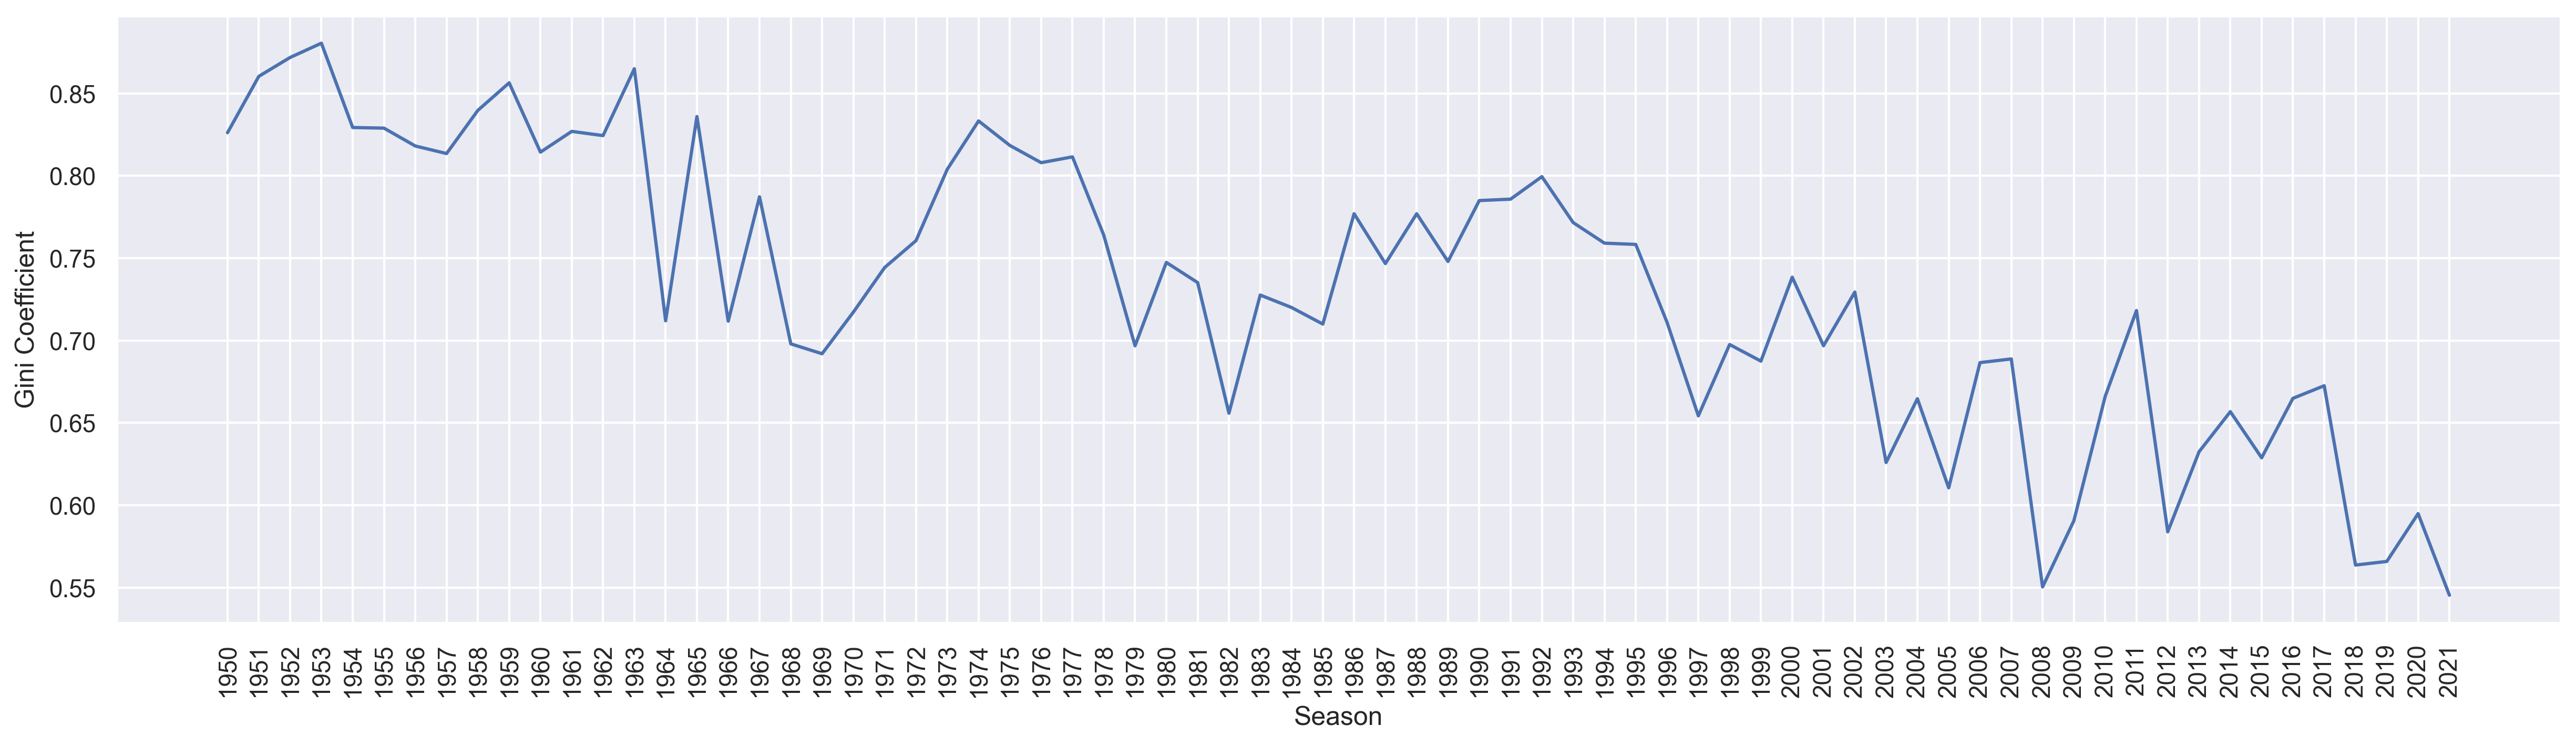

In [44]:
point_totals = df.groupby(['year', 'driverId'])['points'].apply(sum).reset_index()
years = []
ginis = []
for y in point_totals['year'].unique():
    cur = point_totals[point_totals['year'] == y]
    v = cur['points'].values
    bins, result, gini_val = G(v)
    years.append(y)
    ginis.append(gini_val)

asdf = list(zip(years, ginis))
gc = pd.DataFrame(asdf, columns = ['year', 'gini coefficient'])

plt.figure(figsize = (20, 5), dpi = 300);
plt.plot(years, ginis);
# plt.scatter(x = years, y = ginis)
plt.xticks(years, rotation = 90);
plt.ylabel('Gini Coefficient')
plt.xlabel('Season')


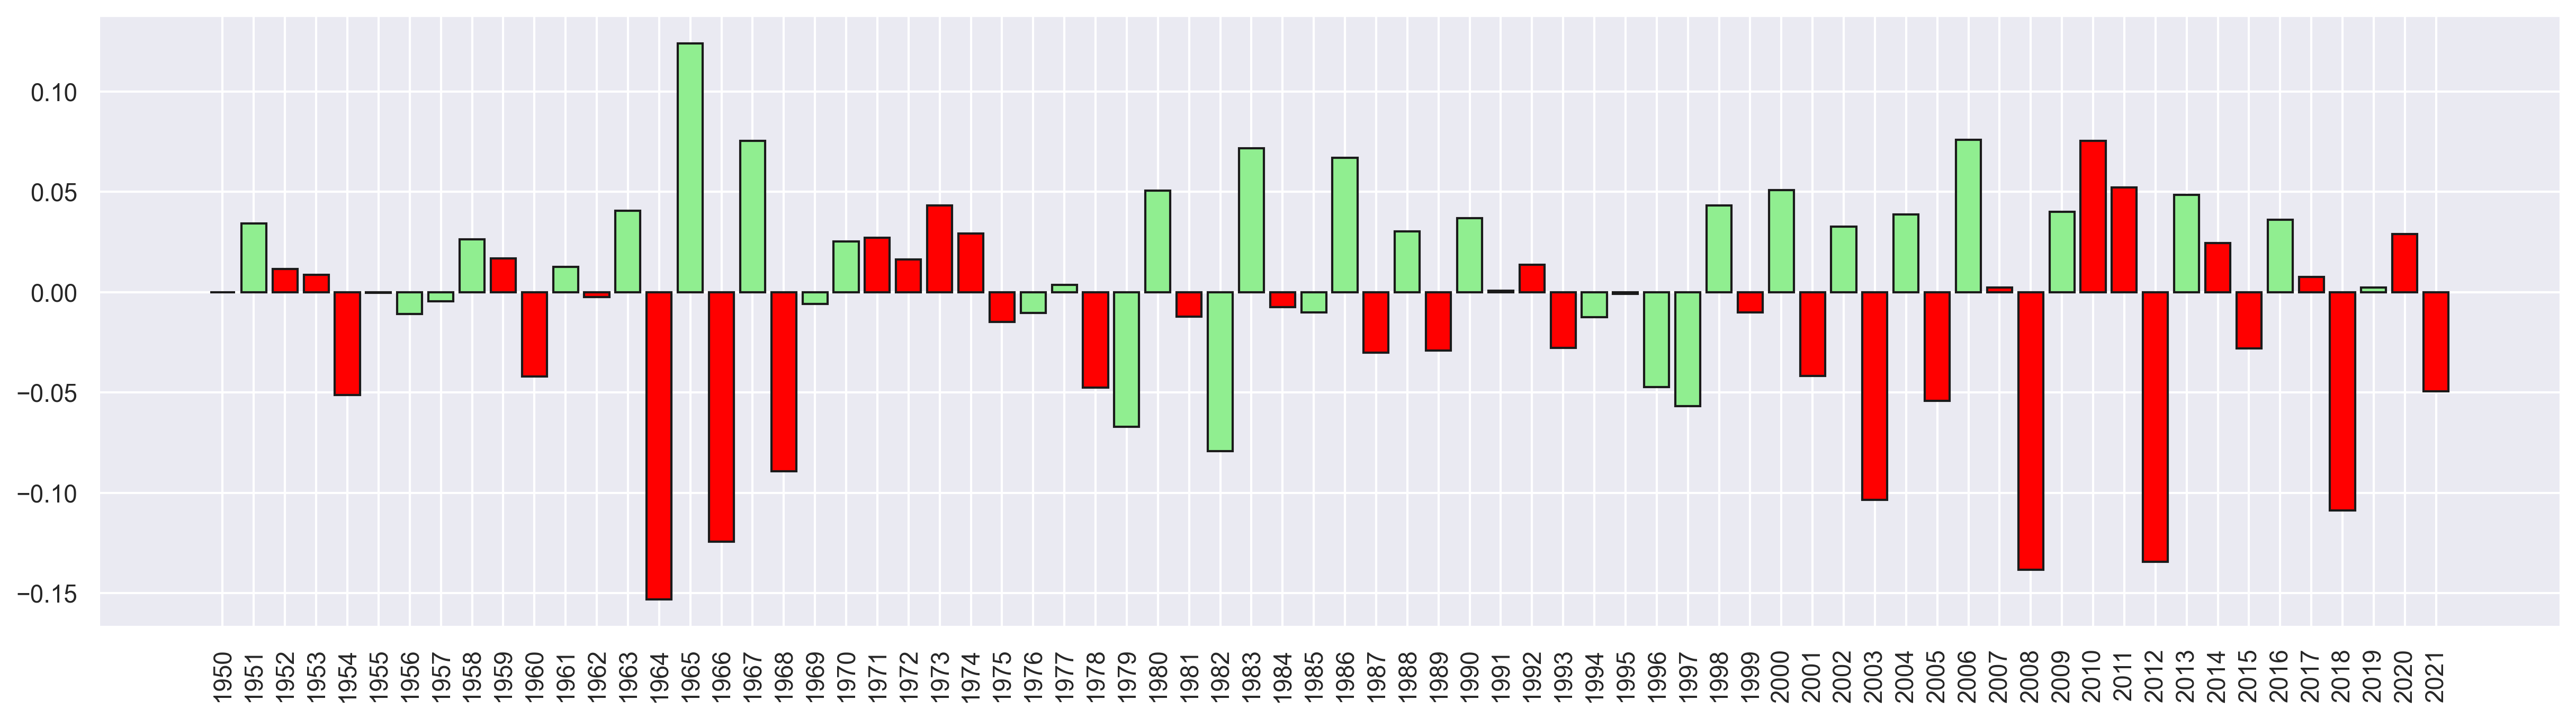

In [45]:

deltas = []
deltas.append(0)
for i in range(1, len(ginis)):
    deltas.append(ginis[i] - ginis[i-1])

colors = []
colors.append('lightgreen')
for i in range(len(deltas)):
    if deltas[i] > 0:
        colors.append('red')
    else:
        colors.append('lightgreen')

direction = []
direction.append(True)
for d in deltas:
    direction.append(d > 0)

plt.figure(figsize = (20, 5), dpi = 300);
plt.bar(data = deltas, x = years, height = deltas, color = colors, edgecolor = 'k');
plt.xticks(years, rotation = 90);